In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100

In [2]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

In [4]:
import pandas as pd
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)
cv_results = cross_validate(
    regressor,
    data,
    target,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
    n_jobs=2,
)

cv_results = pd.DataFrame(cv_results)

In [5]:
cv_results

,fit_time,score_time,test_score,train_score
0,0.120625,0.002012,-46.854497,-1.524362e-14
1,0.118539,0.001967,-46.878194,-3.263539e-15
2,0.115945,0.002049,-45.162955,-9.301776e-15
3,0.120551,0.002046,-43.550623,-1.272711e-14
4,0.114251,0.001982,-47.916857,-8.792278e-15
5,0.115231,0.001955,-45.043402,-1.258597e-14
6,0.116407,0.001945,-43.921987,-1.438987e-14
7,0.116946,0.002027,-44.679523,-3.745497e-15
8,0.115793,0.002052,-44.988872,-1.122960e-14
9,0.117200,0.001963,-45.086595,-3.559599e-15


In [6]:
scores = pd.DataFrame()
scores[["train_error", "test_error"]] = - cv_results[["train_score", "test_score"]]
scores


,train_error,test_error
0,1.524362e-14,46.854497
1,3.263539e-15,46.878194
2,9.301776e-15,45.162955
3,1.272711e-14,43.550623
4,8.792278e-15,47.916857
5,1.258597e-14,45.043402
6,1.438987e-14,43.921987
7,3.745497e-15,44.679523
8,1.122960e-14,44.988872
9,3.559599e-15,45.086595


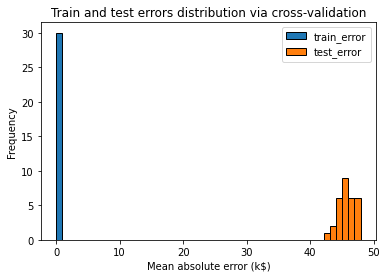

In [7]:
import matplotlib.pyplot as plt

scores.plot.hist(bins=50, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Train and test errors distribution via cross-validation")

## Validation curve

For decision trees, the *max depth* is used to control the tradeoff between under-fitting and over-fitting. 

In [8]:
from sklearn.model_selection import validation_curve

max_depth = [1, 5, 10, 15, 20, 25]
train_scores, test_scores = validation_curve(
    regressor,
    data,
    target,
    param_name="max_depth",
    param_range=max_depth,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=2,
)
train_errors, test_errors = -train_scores, -test_scores


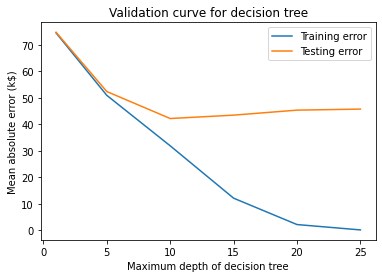

In [9]:
plt.plot(max_depth, train_errors.mean(axis=1), label="Training error")
plt.plot(max_depth, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for decision tree")

In [11]:
train_errors.shape

(6, 30)

Be aware that looking at the mean errors is quite limiting. We should also
look at the standard deviation to assess the dispersion of the score. We
can repeat the same plot as before but this time, we will add some
information to show the standard deviation of the errors as well

<ErrorbarContainer object of 3 artists>

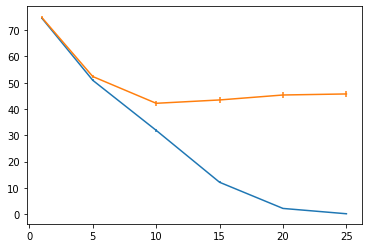

In [13]:
plt.errorbar(max_depth, train_errors.mean(axis=1), yerr=train_errors.std(axis=1), label="Training error")
plt.errorbar(max_depth, test_errors.mean(axis=1), yerr=test_errors.std(axis=1), label="Test error")

In [14]:
cv_results

,fit_time,score_time,test_score,train_score
0,0.120625,0.002012,-46.854497,-1.524362e-14
1,0.118539,0.001967,-46.878194,-3.263539e-15
2,0.115945,0.002049,-45.162955,-9.301776e-15
3,0.120551,0.002046,-43.550623,-1.272711e-14
4,0.114251,0.001982,-47.916857,-8.792278e-15
5,0.115231,0.001955,-45.043402,-1.258597e-14
6,0.116407,0.001945,-43.921987,-1.438987e-14
7,0.116946,0.002027,-44.679523,-3.745497e-15
8,0.115793,0.002052,-44.988872,-1.122960e-14
9,0.117200,0.001963,-45.086595,-3.559599e-15
